# Aufgabenbeschreibung für die Hausarbeit im Modul MP2

First step, the neccessary packages will be imported. Numpy and Pandas for editing the data; Import the datatset from sklearn; Seaborn and Matplotlib for ploting; StandardScalr and MinMaxScalr for processing data.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 1, Beschreibung der Bestandteile des Datensatzes
- The data is downloaded from sklearn.dasets.
- Data comes from the 1990 US Census for block groups in California. The data were processed and made available by researchers who used them in a statistical analysis paper: “Sparse Spatial Autoregressions” by Pace and Barry (1997).
    https://www.kaggle.com/datasets/camnugent/california-housing-prices
- There are a total of 20640 records and 8 attributes: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
    - Median Income
    - Median Age of Housing Units
    - Average Number of Rooms
    - Average Number of Bedrooms
    - Population per hectare (population per acre)
    - Percentage of Households Not Owner Occupied;
    - Latitude;
    -Longitude
- Each attribute has 20640 occurrences; The data is type float64. The values of latitude and longitude can be not only positive but also negative. There is also an option of this Data. This means that the 'target' column should also be shown when necessary.

Import data and define it as HOUSING, then to show original data shape and columms names to have better compact overview.

In [2]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[:])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Change original data to dataframe type then modify it and add a target columm in it, also showing the atrribute dtype and new shape.

(target feature here means price: Jeder Datensatz repräsentiert ein Haus in Kalifornien. Die Zielvariable ist der Medianwert des Hauses in 100.000 USD-Einheiten.)

In [3]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add the target variable (if applicable)
if hasattr(housing, 'target'):
    df['target'] = housing.target
df_new= df
print(df_new.dtypes, df_new.shape)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object (20640, 9)


# 2, Deskriptive Analyse des Datensatzes
There are totally 9 Attribute in df_new: 
 - MedInc	
 - HouseAge	
 - AveRooms	
 - AveBedrms	
 - Population	
 - AveOccup	
 - Latitude	
 - Longitude	
 - target


Let us have a short view of data

In [4]:
df_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Check if there is any zero value inside, in this data there is no error.

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Use built-in function '.describe() ' to check many kinds of characters of data.
- atrribute:  MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude	target
- max: 15.000100	52.000000	141.909091	34.066667	35682.000000	1243.333333	41.950000	-114.310000	5.000010
- min: 0.499900	1.000000	0.846154	0.333333	3.000000	0.692308	32.540000	-124.350000	0.149990
- mean: 3.870671	28.639486	5.429000	1.096675	1425.476744	3.070655	35.631861	-119.569704	2.068558
- std: 1.899822	12.585558	2.474173	0.473911	1132.462122	10.386050	2.135952	2.003532	1.153956

In [6]:
df_new.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


For the distribution two methodes are used here: boxplot and histplot

- Box plots are an effective way to visualize the distribution of data, helping you quickly understand the general characteristics of your data and identify potential outliers. In this case, there are several outliers values in atrribut Population.
- Histplot is a function used to create histograms. It is often used to visualize data distribution. A histogram is a statistical graph that divides data into intervals (often called bins) and shows the number of data points in each bin. 
- KDE option is setted as True. The kde parameter controls whether or not a kernel density estimation (KDE) plot is overlaid on the histogram. While histograms provide a good starting point, they can be blocky, especially with a small number of data points. KDE helps visualise the smoother, continuous distribution behind the histogram.
Identify potential outliers: Deviations from the smooth KDE curve might indicate outliers in your data. Essentially, using kde=True in sns.histplot enhances the visualization by providing a more complete picture of the data's distribution. It combines the clarity of the histogram with the smoothness of the KDE plot.

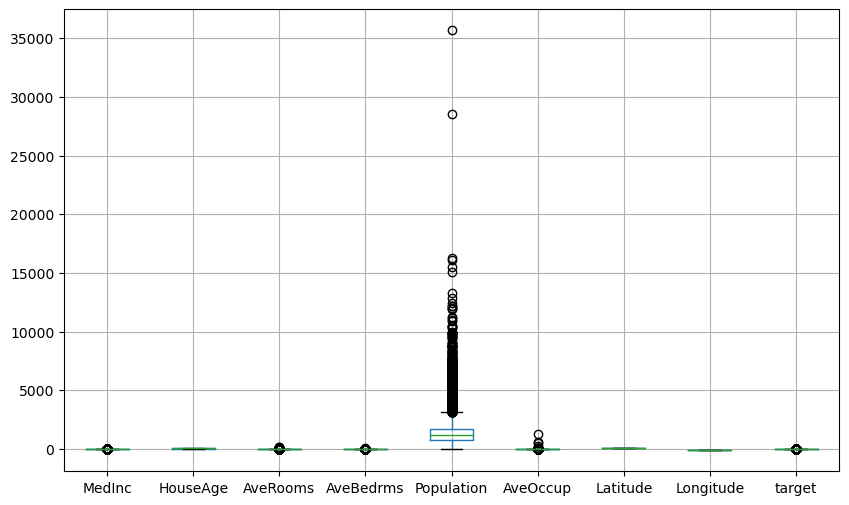

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
df_new.boxplot(ax=ax)
plt.show()

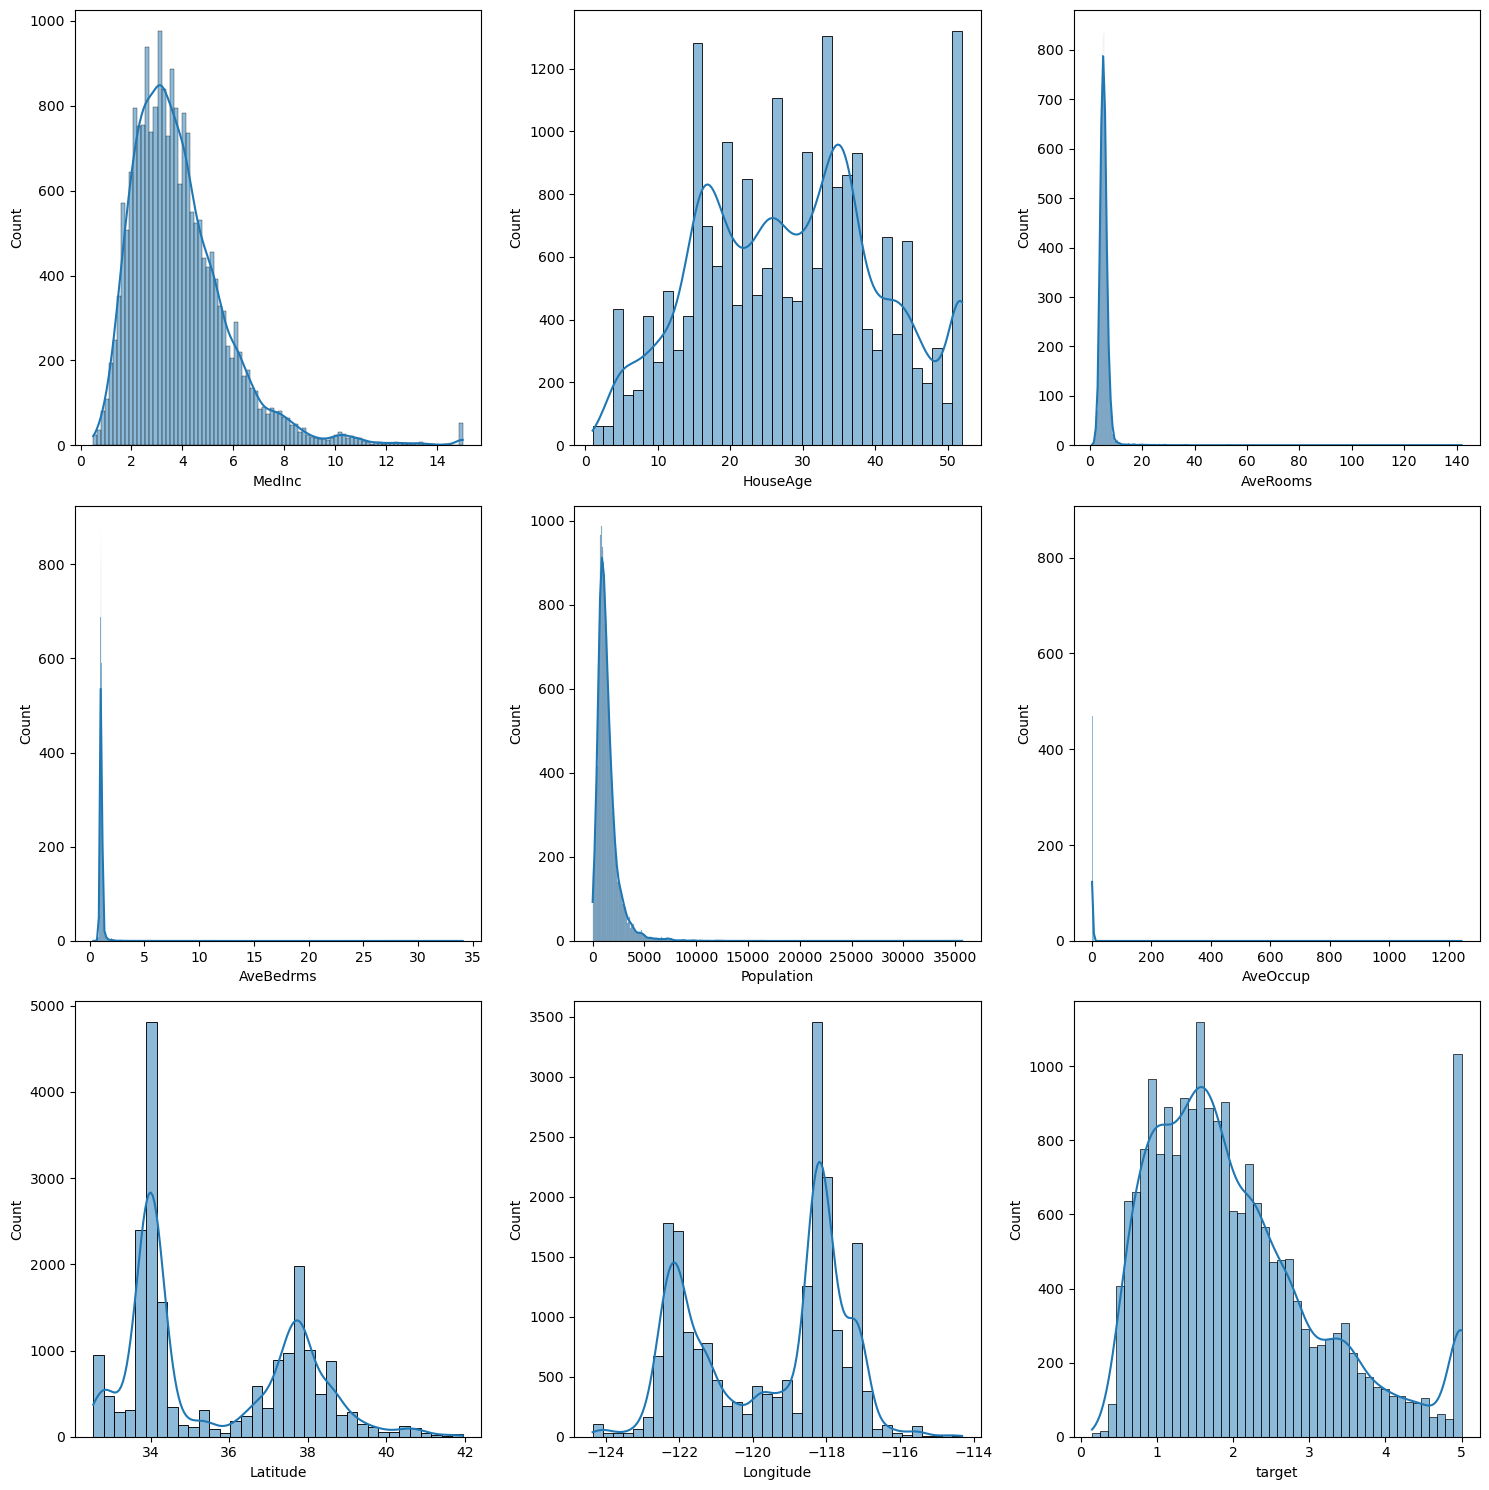

In [8]:
##### columms: MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude	target(house price)
nrows= 3
ncols= 3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # set up the plots layout

data1= df_new['MedInc']
data2= df_new['HouseAge']
data3= df_new['AveRooms']
data4= df_new['AveBedrms']
data5= df_new['Population']
data6= df_new['AveOccup']
data7= df_new['Latitude']
data8= df_new['Longitude']
data9= df_new['target']

#Use sns.distplot() on each subplot to plot histograms and kernel density estimates.
sns.histplot(data1, ax=axes[0, 0], kde=True)
sns.histplot(data2, ax=axes[0, 1], kde=True)
sns.histplot(data3, ax=axes[0, 2], kde=True)
sns.histplot(data4, ax=axes[1, 0], kde=True)
sns.histplot(data5, ax=axes[1, 1], kde=True)
sns.histplot(data6, ax=axes[1, 2], kde=True)
sns.histplot(data7, ax=axes[2, 0], kde=True)
sns.histplot(data8, ax=axes[2, 1], kde=True)
sns.histplot(data9, ax=axes[2, 2], kde=True)
"""longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity"""
plt.tight_layout()
# here the path needs to be changed to local path
plt.savefig('house_x_train_features_histplot.png')
plt.show()

## 3, Beziehungen zwischen Variablen
The Correlation Plots showed below.

The methode here, which used in the lecture will be downloaded and imported. 

In [9]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

Import just downloaded packages

In [10]:
import numpy as np
import thinkstats2
import thinkplot
import brfss
# -Medianeinkommen (Median Income)
# -Medianes Alter der Wohnbevölkerung (Median Age of Housing Units)
# -Durchschnittliche Anzahl der Zimmer (Average Number of Rooms)
# -Durchschnittliche Anzahl der Schlafzimmer (Average Number of Bedrooms)
# -Bevölkerung pro Hektar (Population per Acre)
# -Anteil an Haushalten, die nicht Eigentümer sind (Percentage of Households Not Owner Occupied);
# -Latitude;
# -Longtitude

Then write a function to use build in .corr function to caculate the correlation.

### Spearman Correlation Coefficient: A Comprehensive Overview

#### Introduction

The Spearman correlation coefficient, also known as the rank correlation coefficient, is a non-parametric statistical measure that assesses the strength and direction of the association between two variables. It is similar to Pearson's correlation coefficient, but it does not require the assumption of normally distributed data and is less sensitive to outliers.

#### Calculation of Spearman Correlation Coefficient

The Spearman correlation coefficient is calculated using the following formula:

$$ r_s = 1 - \frac{6 \sum d_i^2}{n(n^2-1)} $$


where:

* r_s is the Spearman correlation coefficient
* d is the difference in ranks for each data point
* n is the number of data points

The Spearman correlation coefficient ranges from -1 to 1:

* r_s > 0 indicates a positive correlation, meaning the ranks of the two variables change in the same direction.
* r_s = 0 indicates no correlation, meaning there is no linear relationship between the ranks of the two variables.
* r_s < 0 indicates a negative correlation, meaning the ranks of the two variables change in opposite directions.


The reason to choose spearman correlation for this data?

- Pearson's correlation coefficient:
Measures the strength and direction of the linear relationship between two continuous variables.
Requires that the data are normally distributed, meaning both variables should be approximately normally distributed.
Sensitive to outliers, meaning extreme values can significantly impact the results.

- Spearman's rank correlation coefficient:
Measures the monotonic relationship between two variables, regardless of whether this relationship is linear.
Does not require the data to be normally distributed, only that the ranks of the data are comparable.
Less sensitive to outliers compared to Pearson's correlation coefficient.

Because we could see that that most data dont fit normal distribution, therefore Spearman's rank correlation coefficient would be more suitable.


In [11]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs) #use pd.Series() to label each input
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [12]:
target= df_new['target'] #target feature here means price: Jeder Datensatz repräsentiert ein Haus in Kalifornien. Die Zielvariable ist der Medianwert des Hauses in 100.000 USD-Einheiten.

Because the data is about the house price, so i will calculate the correaltion between price and everz other attribute. Y axis is price and X axis is other attribute.

And i will use the build in plot function from 'thinkplot' package.

0.6767781095942506

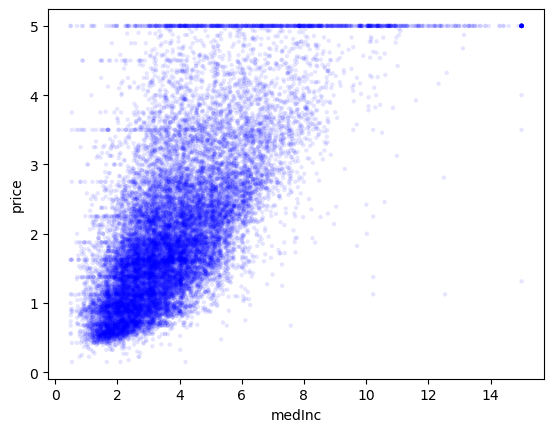

In [13]:
medinc= df_new['MedInc']
thinkplot.Scatter(medinc, target, alpha=0.1, s=10) 
thinkplot.Config(xlabel='medInc',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, medinc)

0.07485485302251019

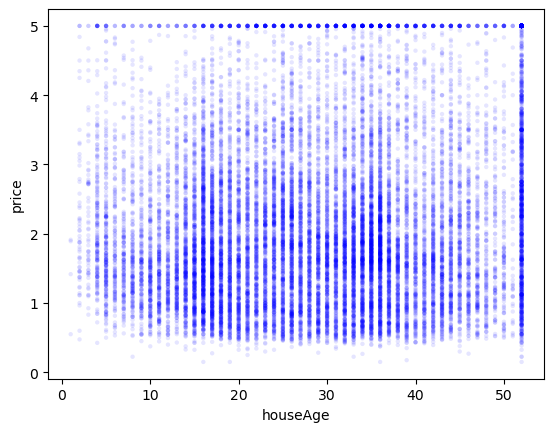

In [14]:
houseage= df_new['HouseAge']
thinkplot.Scatter(houseage, target, alpha=0.1, s=10)
thinkplot.Config(xlabel='houseAge',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, houseage)

0.26336668772954447

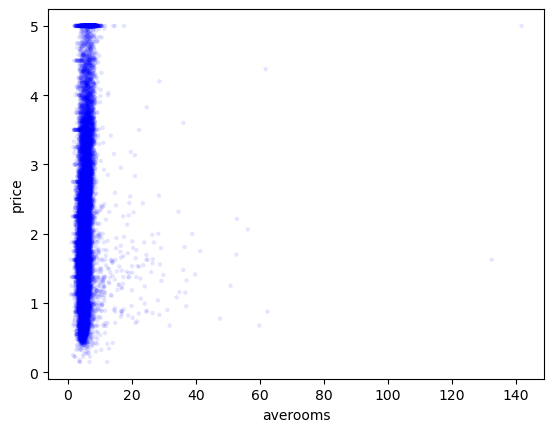

In [15]:
averooms= df_new['AveRooms']
thinkplot.Scatter(averooms, target, alpha=0.1, s=10)
thinkplot.Config(xlabel='averooms',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, averooms)

-0.12518706503579644

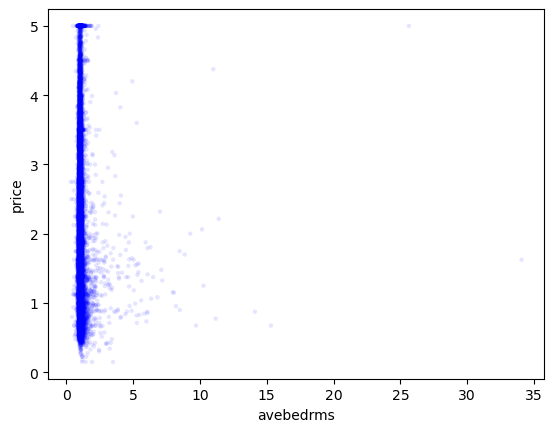

In [16]:
avebedrms= df_new['AveBedrms']
thinkplot.Scatter(avebedrms, target, alpha=0.1, s=10)
thinkplot.Config(xlabel='avebedrms',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, avebedrms)

0.0038387551282557182

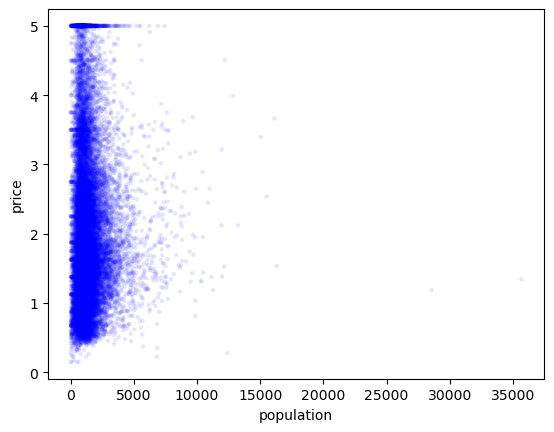

In [17]:
population= df_new['Population']
thinkplot.Scatter(population, target, alpha=0.1, s=10)
thinkplot.Config(xlabel='population',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, population)

-0.2565937646638933

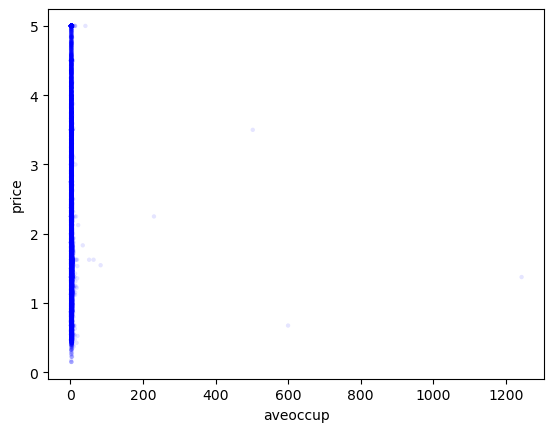

In [18]:
aveoccup= df_new['AveOccup']
thinkplot.Scatter(aveoccup, target, alpha=0.1, s=10)
thinkplot.Config(xlabel='aveoccup',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, aveoccup)

-0.1657388374452999

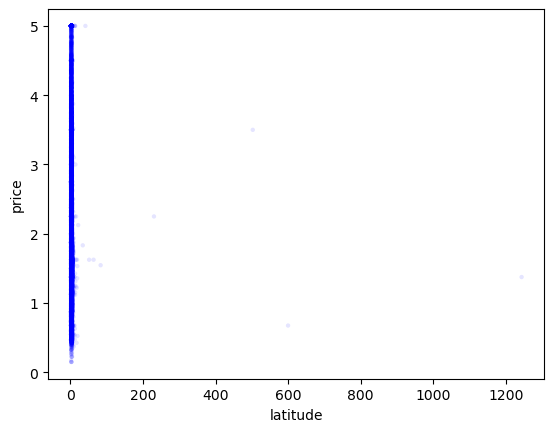

In [19]:
latitude= df_new['Latitude']
thinkplot.Scatter(aveoccup, target, alpha=0.1, s=10)
thinkplot.Config(xlabel='latitude',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, latitude)

-0.06966666665067331

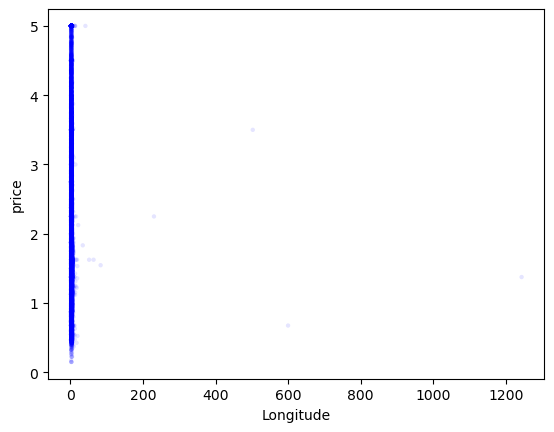

In [20]:
longitude= df_new['Longitude']
thinkplot.Scatter(aveoccup, target, alpha=0.1, s=10)
thinkplot.Config(xlabel='Longitude',
                 ylabel='price',
                 legend=False)

SpearmanCorr(target, longitude)

The observation of plots:
- In the relationship graph between Price and MedianIncome, there are some cases where their MeidanIncome has nothing to do with property prices. (The prices of some houses are very high, but MedinaIncom's values cover the entire range.)
- Houseage has a weak effect on house prices
- There are some samples that have a lot of rooms. Most are under 10.
- There are some samples that have a lot of bedrooms. Most are under 10.
- The population per hectare is below 5000, there are many houses with prices between 1 and 2, but still a few at 5.
- Nothing much in particular found
- Most correlation values of Lontitude and Latitude are very low.

<Axes: >

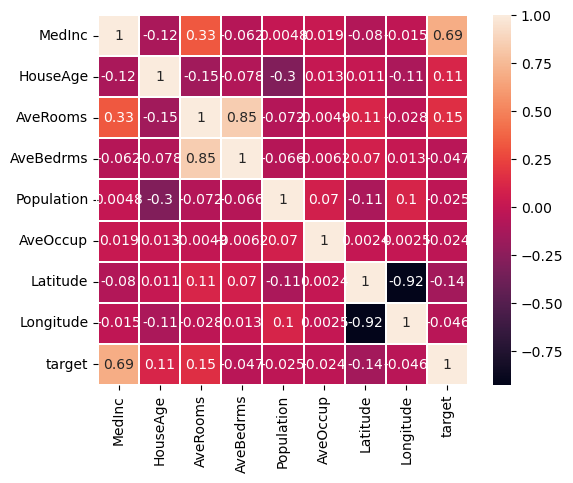

In [21]:
#Here i just used another function to show the whole correaltions between each two atrributes.
sns.heatmap(df_new.corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

From plots above, there could be have some questions to this data:

- Does this data need more attributes? Because in the first plot, some houses with high prices have almost nothing to do with the MedIncome. (For example, the ratio of heirs)
- Is it possible to visualize the data of longitude and latitude so that one can easily understand the data of them?

## 4, Induktive Analyse

Here we use df_new.plot() to visualte the Longituden and Latituden.
Because the longtitude and latitude datacontains the sptial information, there fore to show them out in plot is reasonable.

The density of samples can be seen from the lontitudes and latitudes. It's almost like a visualization of Carlifonia! (L.A, S.F, eg)

<Axes: xlabel='Longitude', ylabel='Latitude'>

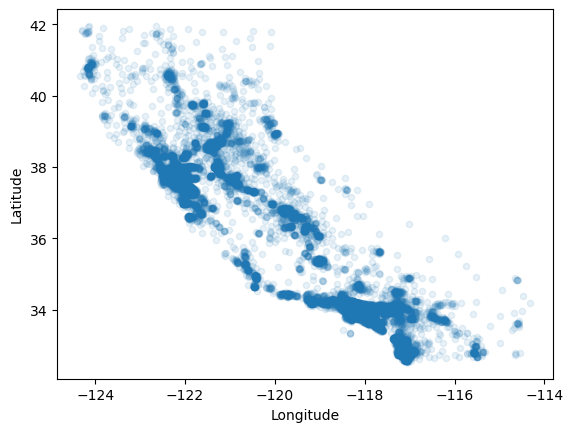

In [22]:
df_new.plot(kind="scatter",x="Longitude",y="Latitude",alpha=0.1)

The plot also shows the population and prices. From this plot, we can see that ares with higher house price has big population.

/tmp/ipykernel_419892/3168257586.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c='target',cmap= plt.cm.get_cmap('jet'),colorbar=True) #target is the price


<Axes: xlabel='Longitude', ylabel='Latitude'>

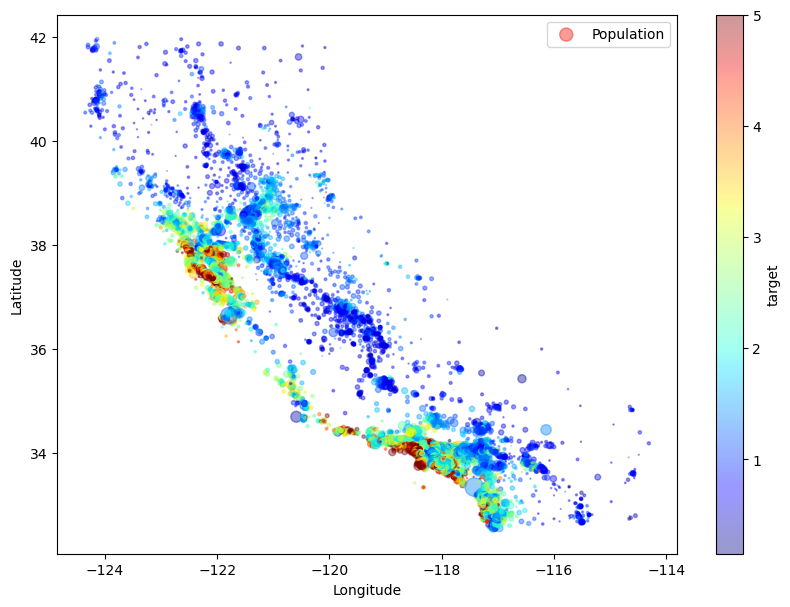

In [23]:
df_new.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.4,s=df_new['Population']/200, #/200 is for scaling
          label='Population',figsize=(10,7), 
          c='target',cmap= plt.cm.get_cmap('jet'),colorbar=True) #target is the price

For a deeper anaylse i would like to have: inheritance can be easily defined with the binary value (true/false).


## 5, Diskussion

Because this carlifonia house price data is often used to do regression. So the scale of atrribute has to be considered! So the data should be further modfied.

There are two typical kinds of scaling: z score scaling and minmax scaling.

### StandardScaler

Principle:

`StandardScaler` transforms each feature to have zero mean and unit variance, often necessary for the proper functioning of many machine learning algorithms, particularly those involving distance calculations like k-nearest neighbors and support vector machines. The transformation is defined by:

$$ z = \frac{(x - \mu)}{\sigma} $$

where \( x \) is the original value, \( \mu \) is the mean of the feature, and \( \sigma \) is the standard deviation of the feature.

Applications:
- Ideal for algorithms that assume data is normally distributed and features have equal scales.
- Useful in optimization algorithms, which are sensitive to the scales of input.

Advantages:
- Maintains useful data about outliers and does not bound values to a specific range.

Disadvantages:
- Not suitable for data with outliers as they will influence the mean and standard deviation.

### MinMaxScaler

Principle:

`MinMaxScaler` scales each feature to a given range, typically 0 to 1, or -1 to 1 if there are negative values. The transformation is calculated using:

$$ x_{\text{scaled}} = \frac{(x - \text{min}(x))}{(\text{max}(x) - \text{min}(x))} \times (\text{new\_max} - \text{new\_min}) + \text{new\_min} $$

where \( x \) is an original value, \(\text{min}(x)\) and \(\text{max}(x)\) are the minimum and maximum values of the feature, respectively. \(\text{new\_min}\) and \(\text{new\_max}\) are the desired scaling range.

Applications:
- Often used when the data needs to be bounded within a scale like 0 to 1.
- Useful for feature scaling for algorithms that weigh inputs like neural networks and algorithms using distance measures like k-nearest neighbors.

Advantages:
- Transforms features to a specific scale.
- Useful when you know the approximate minimum and maximum values that the data can take.

Disadvantages:
- Sensitive to outliers, as they can compress most of the data into a narrow range.
- Does not handle outliers as well as `StandardScaler`.


Means after standardization:
 MedInc        6.609700e-17
HouseAge      5.508083e-18
AveRooms      6.609700e-17
AveBedrms    -1.060306e-16
Population   -1.101617e-17
AveOccup      3.442552e-18
Latitude     -1.079584e-15
Longitude    -8.526513e-15
target        2.068558e+00
dtype: float64

Standard deviations after standardization:
 MedInc        1.000024
HouseAge      1.000024
AveRooms      1.000024
AveBedrms     1.000024
Population    1.000024
AveOccup      1.000024
Latitude      1.000024
Longitude     1.000024
target        1.153956
dtype: float64


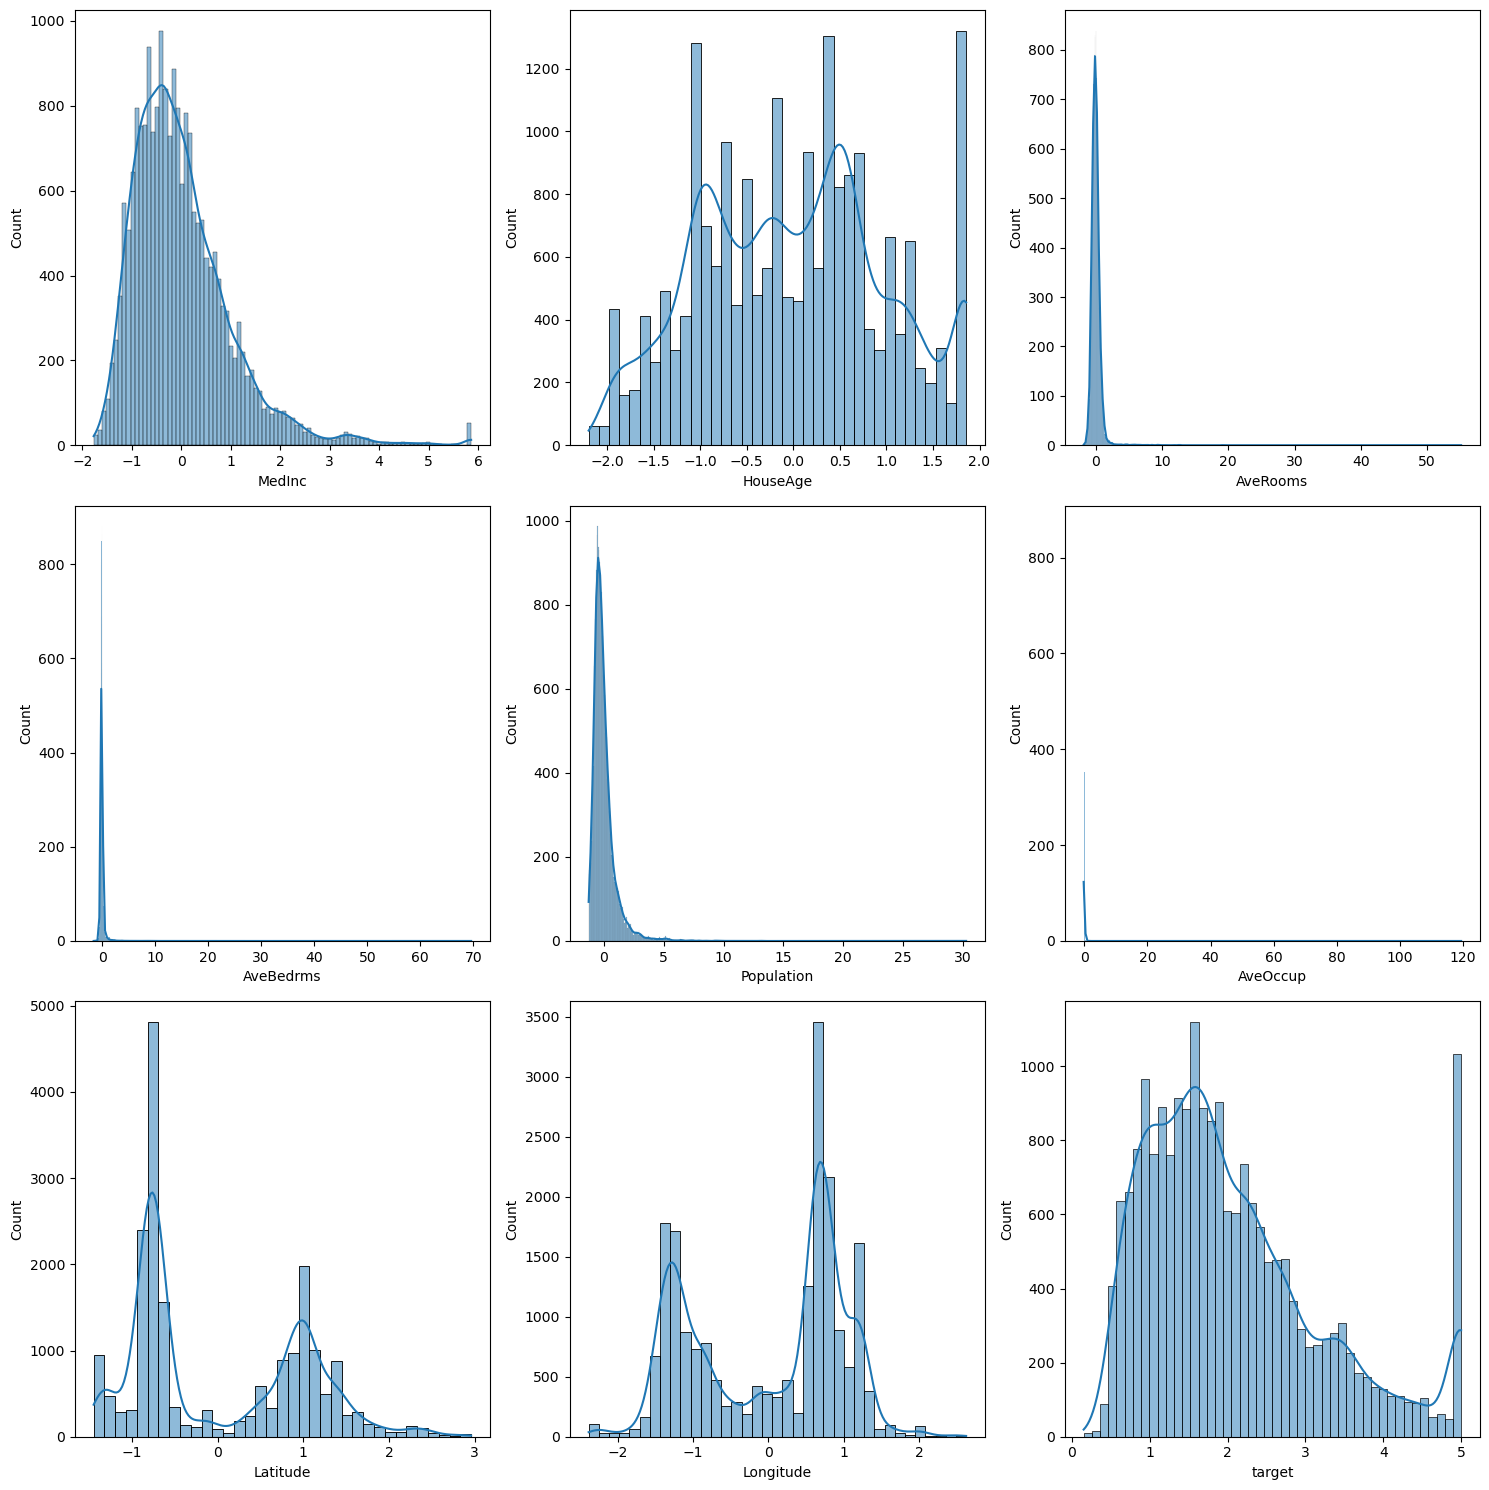

In [24]:
###################### Z score normalization #####################
scaler = StandardScaler()

df_new_copy= df_new.copy()
df_scaled = scaler.fit_transform(df_new_copy.drop(columns=['target']))  # Assume 'target' is the target column, no normalization is done
normalized_df = pd.DataFrame(df_scaled, columns=df_new_copy.drop(columns=['target']).columns)  # Convert normalized data back to DataFrame
normalized_df['target'] = df_new['target']
#print(normalized_df.head())
means = normalized_df.mean()
stds = normalized_df.std()

print("Means after standardization:\n", means)
print("\nStandard deviations after standardization:\n", stds)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Resize to a larger size to prevent graphics from being crowded

sns.histplot(normalized_df['MedInc'], ax=axes[0, 0], kde=True)
sns.histplot(normalized_df['HouseAge'], ax=axes[0, 1], kde=True)
sns.histplot(normalized_df['AveRooms'], ax=axes[0, 2], kde=True)
sns.histplot(normalized_df['AveBedrms'], ax=axes[1, 0], kde=True)
sns.histplot(normalized_df['Population'], ax=axes[1, 1], kde=True)
sns.histplot(normalized_df['AveOccup'], ax=axes[1, 2], kde=True)
sns.histplot(normalized_df['Latitude'], ax=axes[2, 0], kde=True)
sns.histplot(normalized_df['Longitude'], ax=axes[2, 1], kde=True)
sns.histplot(normalized_df['target'], ax=axes[2, 2], kde=True)

plt.tight_layout()
plt.savefig('house_x_train_features_histplot_Z_normalization.png')
plt.show()

Means after standardization:
 MedInc        0.232464
HouseAge      0.541951
AveRooms      0.032488
AveBedrms     0.022629
Population    0.039869
AveOccup      0.001914
Latitude      0.328572
Longitude     0.476125
target        2.068558
dtype: float64

Standard deviations after standardization:
 MedInc        0.131020
HouseAge      0.246776
AveRooms      0.017539
AveBedrms     0.014049
Population    0.031740
AveOccup      0.008358
Latitude      0.226988
Longitude     0.199555
target        1.153956
dtype: float64


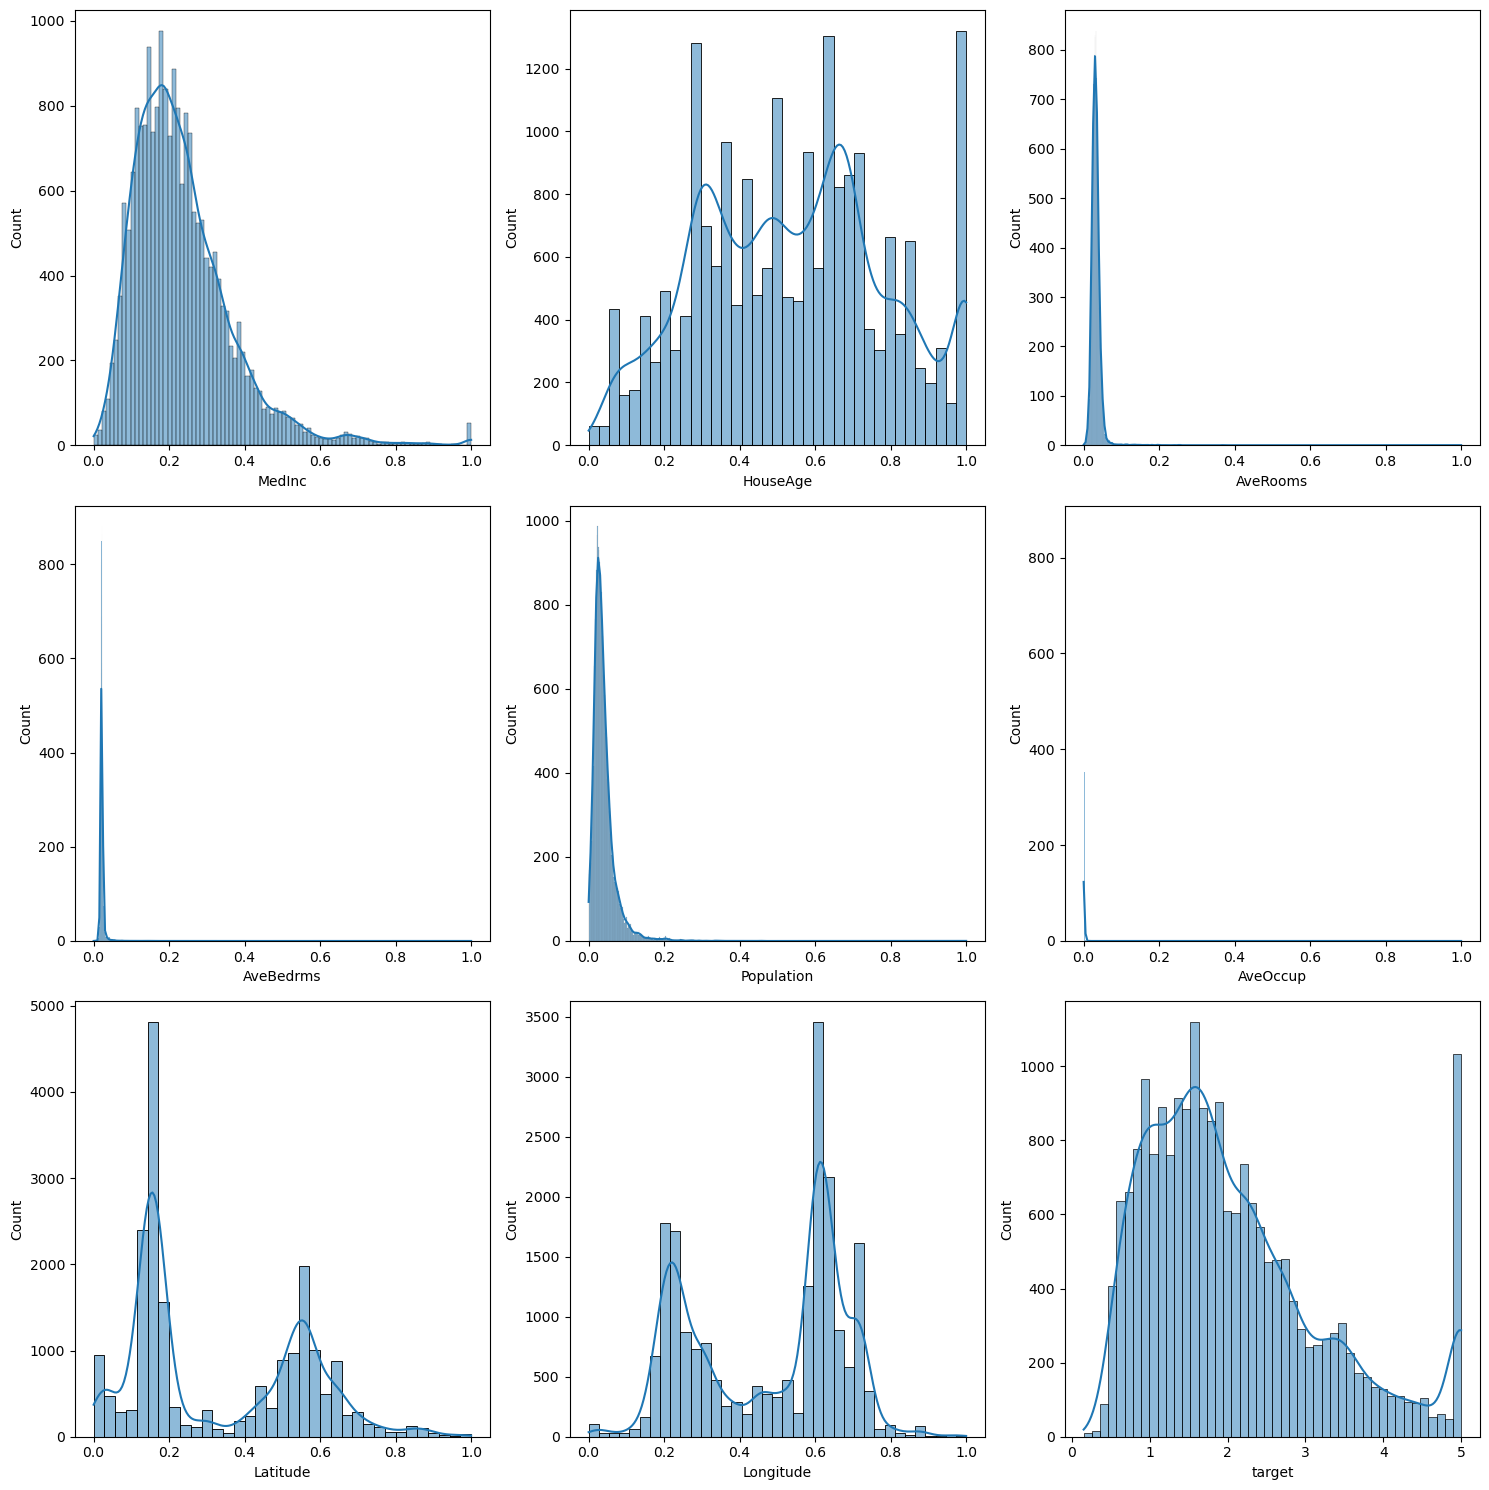

In [25]:
###################### Min-Max normalization #####################
scaler = MinMaxScaler()

df_new_copy_minmax= df_new.copy()
df_scaled = scaler.fit_transform(df_new_copy_minmax.drop(columns=['target']))  # # Assume 'target' is the target column, no normalization is done
normalized_minmax_df = pd.DataFrame(df_scaled, columns=df_new_copy_minmax.drop(columns=['target']).columns)  # Convert normalized data back to DataFrame
normalized_df['target'] = df_new['target']
normalized_minmax_df['target'] = df_new['target']
#print(normalized_minmax_df.head())
means = normalized_minmax_df.mean()
stds = normalized_minmax_df.std()
print("Means after standardization:\n", means)
print("\nStandard deviations after standardization:\n", stds)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Resize to a larger size to prevent graphics from being crowded

sns.histplot(normalized_minmax_df['MedInc'], ax=axes[0, 0], kde=True)
sns.histplot(normalized_minmax_df['HouseAge'], ax=axes[0, 1], kde=True)
sns.histplot(normalized_minmax_df['AveRooms'], ax=axes[0, 2], kde=True)
sns.histplot(normalized_minmax_df['AveBedrms'], ax=axes[1, 0], kde=True)
sns.histplot(normalized_minmax_df['Population'], ax=axes[1, 1], kde=True)
sns.histplot(normalized_minmax_df['AveOccup'], ax=axes[1, 2], kde=True)
sns.histplot(normalized_minmax_df['Latitude'], ax=axes[2, 0], kde=True)
sns.histplot(normalized_minmax_df['Longitude'], ax=axes[2, 1], kde=True)
sns.histplot(normalized_minmax_df['target'], ax=axes[2, 2], kde=True)

plt.tight_layout()
plt.savefig('house_x_train_features_histplot_minmax_normalization.png')
plt.show()


After scaling, we can compare the statistical properties (like mean and standard deviation) of the scaled features to understand the effect of each scaling method.

- StandardScaler will transform the features so they have mean close to 0 and standard deviation close to 1.
- MinMaxScaler will transform the features so their values are bounded between 0 and 1.

Both scaling methods prepare data for machine learning algorithms that might perform better if features are on similar scales or are normalized. This is especially true for algorithms that depend on the magnitude of features, such as k-nearest neighbors and gradient descent-based algorithms.

## 6, Bonus
- Falls möglich, versuchen Sie ihren Datensatz mit weiteren Daten
  anzureichern oder einen weiteren, denselben Sachverhalt
  beschreibenden, Datensatz zu besorgen. Erweitern Sie danach Ihre
  Analyse um die angereicherten Daten.